# [Misplaced Priorities - Part 3](https://xpuzzlecorner.substack.com/p/misplaced-priorities-part-3)
## January 19, 2025

## Problem 

_Our job is to figure out how many swaps on average are needed to order a line of 10 people that have been shuffled randomly where, after each one of your swaps, a random swap will occur.  Once you’ve successfully re-ordered the line of 10 people, the random swaps will stop (so the situation doesn’t go on indefinitely). How about for a line of n people?_

## Solution

Recall from part 1 and part 2 that a reshuffling of a line of n people can be modeled as a permutation on n elements and that permutations can be decomposed into disjoint cycles. We'll start be re-using the simple relationship between the number of people n we're considering and the number of cycles present in a random permutation of n people. If S is the number of swaps needed to sort a random permutation of n people, and C is the number of cycles in that permutation, then we have the following relationship:

$$
S = n - C
$$

This is because each cycle can be sorted with one less swap than the number of people in that cycle. For example, if we have a cycle of length 3, we can sort it with 2 swaps. If we have a cycle of length 4, we can sort it with 3 swaps, and so on. Thus, the total number of swaps needed to sort the permutation is equal to the total number of people minus the number of cycles.

So if we can figure out how the random swaps affect the number of cycles, we can figure out how many swaps are needed on average to sort a random permutation of n people. To do this, we will use the following relationship between the number of cycles in a random permutation.

A swap consists of two people exchanging places $x_i$ and $x_j$. In our model using permutations, this is equivalent to the permutation mapping being modified such that:

- The original element $x'_i$ that mapped to $x'_i$ now maps to $x_j$.
- The original element $x'_j$ that mapped to $x'_j$ now maps to $x_i$.

To figure out how this affects the number of cycles, I tried a few examples and noticed the following pattern:

- If $x_i$ and $x_j$ are in the same cycle, then that cycle get's split into 2 and the number of cycles increases by 1.
- If $x_i$ and $x_j$ are in different cycles, then those two cycles get merged into one and the number of cycles decreases by 1.

To test whether this was true in general, I tried creating some informal proofs. The first one is as follows:

### Proof that the number of cycles increases by 1 when two elements are in the same cycle

Suppose we have a cycle of length $k$ that contains the elements $x_i$ and $x_j$. Without loss of generality we will assume $i<j$. The cycle can be represented as follows:
$$
x_{i-1} \to x_i \to \cdots x_{j-1} \to x_j \to \cdots \to x_k \to x_{i-1}
$$

Now, if we swap $x_i$ and $x_j$, we have:
$$
x_{i-1} \to x_j \to x_{j+1} \to \cdots x_k \to x_{i-1}
$$

But note that $x_i$ has been excluded. Instead it now forms a new cycle.
$$
x_{j-1} \to x_i \to x_{i+1} \to \cdots x_{j-1}
$$

So we've created two cycles!

### Proof that the number of cycles decreases by 1 when two elements are in different cycles

We now consider two cycles written as follows (again, without loss of generality, we assume $i<j$):
$$
a_{i-1} \to a_i \to \cdots \to a_k \to a_{i-1}
$$

$$
b_{j-1} \to b_j \to \cdots \to b_l \to b_{j-1}
$$

Now, if we swap $a_i$ and $b_j$, we have:

$$
a_{i-1} \to b_j \to b_{j+1} \to \cdots \to b_l \to b_{j-1} \to a_i \to a_{i+1} \to \cdots \to a_k \to a_{i-1}
$$

So we've merged the two cycles into one!

From here we can conclude that every swap will either increase or decrease the number of cycles by 1. Now we just need to consider what the probability is that the two elements are in the same cycle or different cycles. How might we do that? 

---
### This section is incorrect! 
In the explanation below, I forgot to account for the fact that our permutation is _not_ random most of the time. In fact, we are trying to modify it to become the identity permutation, which has n cycles, making it much more likely that a two elements swap will _add_ a cycle.

Well, if we leverage the structure of a cycle, we know that if we start at some element $x_i$ and follow the mapping, we will eventually return to $x_i$. If $x_j$ is in the same cycle, this it must be reachable from $x_i$ and we should reach $x_j$ before we reach $x_i$ again. Thus, the probability that $x_j$ is in the same cycle as $x_i$ is the probability that we reach $x_j$ before we reach $x_i$ again. To compute this, we'll need to consider different numbers of elements between $x_i$ and $x_j$, which depends on the number of elements in the cycle.

$$
P(x_j \text{ is in the same cycle as } x_i) = \sum_{k=1}^{n-1} P(k \text{ elements in cycle}) \cdot P(x_j \in \text{cycle}| k \text{ elements in cycle})
$$

The probability of having $x_j$ in the cycle given that there are $k$ elements in the cycle is:
$$
P(x_j \in \text{cycle}| k \text{ elements in cycle}) = \frac{k-1}{n-1}
$$

The probability that there are $k$ elements in the cycle is a bit more involved. First, if there are $k$ elements in a cycle (including $x_i$), then there are $k-1$ we need to choose to be part of the cycle out of the $n-1$ remaining elements. Additionally, we need to that these $k$ elements form a cycle. From part 2, we know that for $k$ elements, there are $(k-1)!$ ways to form a cycle. Finally, the remainming elements can be permuted however. All together, we have:
$$
P(k \text{ elements in cycle}) = \frac{\binom{n-1}{k-1} \cdot (k-1)! \cdot (n-k)!}{n!} = \frac{ \frac{(n-1)!}{(n-k)!(k-1)!} \cdot (k-1)! \cdot (n-k)!}{n!} = \frac{1}{n}
$$

Putting these together, we have:

$$
P(x_j \text{ is in the same cycle as } x_i) = \sum_{k=1}^{n-1} \frac{1}{n} \cdot \frac{k-1}{n-1} = \frac{1}{n(n-1)} \sum_{k=1}^{n-1} k-1 = \frac{1}{n(n-1)} \left( \frac{n(n-1)}{2} - (n-1) \right) = \frac{1}{2}
$$

Isn't that crazy! The probability doesn't depend on the number of elements. 

Returning back to our original questions, this means that on average, half of the swaps will increase the number of cycles and half will decrease the number of cycles. Recall back from part 2 that the average number of cycles in a permutation on n elements is $H_n$, the nth harmonic number. Thus, the average number of swaps needed to sort a random permutation, even with a random swap after each swap, is still just:

$$
\mathbb{E}[S] = n - \mathbb{E}[C] = n - H_n
$$

which for 10 people is $10-H_{10} \approx 10 - 2.92896825397 \approx 7.07103174603$.

---

In the solution above, I forgot to account for the fact that our permutation is _not_ random most of the time. Instead we will have to account for the fact that we are intentionally trying to sort the permutation. So how do we deal with this situation? Given that (1) we are starting from a known state, (2) want to end up in a goal state, (3) the history of swaps is not relevant, and (4) we can model the probability of moving between states, we can use a Markov Chain to model the situation.

The first question is how we represent the states of the chain since using every possible permutation is not feasible. Instead, we can represent the states of the Markov Chain as the size of each cycle (i.e. a partition of n). Our goal state is when the partition is all 1s. With this in mind, our initial probabilities for which state we start in is given by the distribution of cycle sizes in a random permutation. Conveniently, we computed this in part 2!

The transition probabilities will need to account two different actions: (1) the random swap between two elements and (2) the swap that we make which will always break apart a cycle. For the first swap, we can compute the likelihood of moving between different cycles structures when we swap two elements. This will result in either a cycle merging or splitting, depending on whether the two elements are in the same cycle or not. For the second swap, we can just uniformly sample from every possible swap that breaks apart a cycle (since they all accomplish our intended goal equally as well). This will result in a uniform distribution over all possible cycle structures that have one less cycle than the previous state.

At one point I thought the markov chain could simply be the number of swaps needed $s=n-c$ without accounting for the particular cycle structure but the random swaps sort of ruin this approach since the probability of a merge defintely depends on the cycle strucutre even if there are the same number of cycles (consider the example of 2 5-cycles vs 1 1-cycle and 1 9-cycle if you want to verify for yourself). Interestingly, this also means that there is some strategy involved in choosing which swap to make. For example if we have a 2-cycle and a 8-cycle, we should swap elements within the 2-cycle to break it apart since that will increase the odds that the subsequent random swap will also break a cycle and bring us close to the goal state. 

To verify this formally, let's first show that the optimal way to break up a cycle of size $c$ (assuming we've already selected a cycle to break) to maximize the chance that a subsequnt random swap to also break a cycle is into $c-1$ and $1$. Then we use this fact to verify that the best cycle to break is the smallest cycle of size greater than 1.

### Part A: Breaking a Single Cycle of Length $c$

Suppose we have already decided on a cycle of length >1 to split. You want to break it into two cycles of lengths $(i,\,c-i)$. The goal is to determine which split maximizes the total number of same-cycle pairs in the resulting partition.

- After the split into $(i,\,c-i)$, the number of same-cycle pairs contributed by these two new cycles is:
  $$
     \binom{i}{2} \;+\; \binom{c-i}{2}
  $$
- If you break the cycle into $(1,\,c-1)$, the contribution is:
  $$
     \binom{1}{2} \;+\; \binom{c-1}{2} \;=\; 0 \;+\; \binom{c-1}{2} \;=\; \binom{c-1}{2}
  $$

We claim:
$$
  \binom{c-1}{2}
  \;\;\ge\;\;
  \binom{i}{2} \;+\; \binom{c-i}{2},
  \quad
  \text{for all } 1 \le i \le c-1,
$$
with **equality only** if $i = 1$ or $i = c-1$.

#### Proof of the Inequality

Define:
$$
  g(i)
  \;=\;
  \binom{c-1}{2}
  \;-\;
  \Bigl[\binom{i}{2} + \binom{c-i}{2}\Bigr].
$$
We want to show $g(i) \ge 0$ for $1 \le i \le c-1$.

1. **Expand**:
   $$
   \binom{c-1}{2} = \frac{(c-1)(c-2)}{2},
   \quad
   \binom{i}{2} = \frac{i(i-1)}{2},
   \quad
   \binom{c-i}{2} = \frac{(c-i)(c-i-1)}{2}.
   $$

2. Substitute into $g(i)$:
   $$
   \,g(i)
   \;=\;
   (c-1)(c-2)
   \;-\;
   \Bigl[
      i(i-1) \;+\; (c-i)(c-i-1)
   \Bigr].
   $$

3. Simplify:
   After all the algebra, we get:
    $$
    g(i) = i(c-i) - c + 1
    $$
    The first term is minimized for $i=1$ or $i=c-1$ and result in $g(i) = 0$. So for every $i$ other than 1 or $c-1$, we have $g(i) > 0$.

### Part B: Choosing Which Cycle to Break in a Permutation

Suppose a permutation has cycles of lengths $c_1, c_2, \dots, c_m$, where $c_1 \le c_2 \le \dots \le c_m$, and each $c_i \ge 1$. The goal is to choose one cycle of length $\ge 2$ to break, in such a way that the total number of same-cycle pairs after the break is maximized (which will also maximize the change that the random swap will cause a break).

#### Claim

Breaking the **smallest cycle of length $\ge 2$** yields the largest total number of same-cycle pairs in the resulting partition.

#### Proof

Suppose you have two cycles of lengths $a$ and $b$, with $1 < a < b$.
**Case 1**: Break the smaller cycle ($a$) into $(a-1, 1)$.  
   - The resulting number of same-cycle pairs from these two cycles is:
     $$
     \binom{a-1}{2} + \binom{1}{2} + \binom{b}{2}
     \;=\;
     \binom{a-1}{2} + \binom{b}{2}.
     $$

**Case 2**: Break the larger cycle ($b$) into $(b-1, 1)$.  
   - The resulting number of same-cycle pairs from these two cycles is:
     $$
     \binom{b-1}{2} + \binom{1}{2} + \binom{a}{2}
     \;=\;
     \binom{b-1}{2} + \binom{a}{2}.
     $$

Compare the two cases:
$$
    \Bigl[\binom{a-1}{2} + \binom{b}{2}\Bigr]
    \;-\;
    \Bigl[\binom{b-1}{2} + \binom{a}{2}\Bigr]
    \;=\;
\frac{1}{2} \Bigl[ (a-1)(a-2) + b(b-1) - \bigl((b-1)(b-2) + a(a-1)\bigr) \Bigr]
$$

$$
(a-1)(a-2) = a^2 - 3a + 2, \quad b(b-1) = b^2 - b
$$
$$
(b-1)(b-2) = b^2 - 3b + 2, \quad a(a-1) = a^2 - a
$$

$$
(a^2 - 3a + 2) + (b^2 - b)
-
\bigl[(b^2 - 3b + 2) + (a^2 - a)\bigr]
$$

$$
a^2 - 3a + 2 + b^2 - b - b^2 + 3b - 2 - a^2 + a
$$

Combine like terms:
- $a^2 - a^2 = 0$,
- $b^2 - b^2 = 0$,
- $-3a + a = -2a$,
- $-b + 3b = 2b$,
- $2 - 2 = 0$.

    The result is:
   $$
    \frac{1}{2} \bigl[2b - 2a \bigr] = b-a
   $$
   Since $b > a$, the difference is positive. Hence, breaking the smaller cycle contributes more same-cycle pairs.


Ok, so we know we should break the smallest cycle of size greater than 1 and break it into 1 and $c-1$.

### Markov Chain

#### Initial Distribution

So, getting started, the initial probability distribution is given by the distribution of cycle sizes in a random permutation. This is given by:

$$
P(p) = P(p|K) P(K)
$$
where $K$ is the number of elements out of $n$ that are fixed and $p$ is a particular partition/cycle structure. The probability of a partition given a set number of fixed points is given by:

$$
P(p|K) = \frac{k!}{\displaystyle \prod_{p \in P_k} p! \cdot \prod_{s \in \text{\{\# partitions of size s\}}} s!}
$$
and P(K) was computed in part 1 and is given by:

$$
P(K) = \binom{10}{k} \cdot \sum_{i=0}^{10} \frac{(-1)^i}{i!}
$$

#### Transition Probabilities - Our Swap

This is fairly straightforward. We need only identify the smallest cycle $>1$ and break it into 1 and $c-1$. Ties shouldn't matter as we are breaking optimally so we can either uniformly distribute the probability over all optimal swaps or just pick one arbitrarily.

#### Transition Probabilities - Random Swap

For the random swap, we need to first consider the different possibilities of merging and breaking cycles. Overall, there are $\binom{n}{2}$ possible ways of selecting 2 elements from $n$. If we are starting with partition $p = \{c_1, c_2, \ldots, c_m\}$, we can consider the following cases:

1. If we swap two elements in the same cycle, then we will break that cycle into two cycles of sizes $c_i$ and $c_j$.
2. If we swap two elements in different cycles, then we will merge those two cycles into one cycle of size $c_i + c_j$.

We need to compute the probability of each of these cases. In both cases, we will count the number of pairs that satisfy the cycle change we're analyzing. For the case of splitting a cycle, we will consider the number of pairs where we split into $i$ and $c-i$ (where $c$ is the length of the cycle) for each $i$. We need to consider 2 cases: $2i = c$ and $2i \neq c$. In the first case, we have $\frac{c}{2}$ pairs and in the second we have $c$ pairs. Thus, we have:

$$
\text{\# pairs that split a cycle of size } c = \begin{cases}
    \frac{c}{2} & \text{if } 2i = c \\
    c & \text{if } 2i \neq c
\end{cases}
$$

For the case of merging cycles, we will consider the number of pairs where we merge two cycles of sizes $c_i$ and $c_j$. In this case, we have $c_i \cdot c_j$ possible pairs. Here again we must consider two possible cases: $c_i = c_j$ and $c_i \neq c_j$. In the first case, we choose 2 cycles of size $c_i$ out of the $m$ cycles of size $c_i$. In the second case, we needn't worry about this since we are already counting all pairs of cycles of size $c_i$ and $c_j$. Thus, we have:

$$
\text{\# pairs that merge cycles of sizes } c_i \text{ and } c_j = \begin{cases}
    \binom{m}{2} c_i^2 & \text{if } c_i = c_j \\
    m_i m_j c_i c_j & \text{if } c_i \neq c_j
\end{cases}
$$
where $m_i$ is the number of cycles of size $c_i$ and $m_j$ is the number of cycles of size $c_j$.

Finally, pulling together the initial distribution and transition probabilities, we can use an [abosrbing Markov chain](https://en.wikipedia.org/wiki/Absorbing_Markov_chain) to compute the expected number of steps to reach the goal state. We decompose the transition matrix into the form:

$$
{\displaystyle P={\begin{bmatrix}Q&R\\\mathbf {0} &I_{r}\end{bmatrix}},}
$$

and then compute the fundamental matrix:

$$
N = (I - Q)^{-1}
$$

The expected number of steps to reach the goal state is given by the product of the initial distribution and the fundamental matrix:

$$
\mathbb{E}[S] = P_0 \cdot N \cdot \mathbb{1}
$$

where $P_0$ is the initial distribution and $\mathbb{1}$ is a column vector of 1s.


In [ ]:
from collections import Counter
from math import comb, factorial
import random
from typing import List, Tuple

def D(k: int) -> int:
    if k == 0:
        return 1
    if k == 1:
        return 0

    prev = 1  # D_0
    curr = 0  # D_1

    for i in range(2, k + 1):
        next_val = (i - 1) * (prev + curr)
        prev, curr = curr, next_val

    return curr

def partition_to_multiset(lambda_part: List[int]) -> Counter:
    """
    Given a partition of n as a list (e.g. [4,3,2,1]),
    return a Counter (dict) of {cycle_length: multiplicity}.
    """
    return Counter(lambda_part)

def multiset_to_partition(multiset_dict: Counter) -> List[int]:
    """
    Reconstruct a sorted partition (descending or ascending)
    from a {cycle_length: multiplicity} dict/Counter.
    """
    result = []
    for k, count_k in multiset_dict.items():
        result.extend([k]*count_k)
    return sorted(result, reverse=True)

def n_from_partition(lambda_part: List[int]) -> int:
    """
    Return total n for the given partition. E.g. [4,3,2,1] -> 10.
    """
    return sum(lambda_part)

def num_merge_pairs(a: int, b: int, m_a: int, m_b: int) -> int:
    """
    Number of ways (unordered pairs) to merge two cycles of lengths a, b
    given that there are m_a cycles of length a, m_b cycles of length b.
    
    Case 1: a != b -> m_a*m_b*(a*b).
    Case 2: a == b -> comb(m_a, 2)*(a^2).
    """
    if a != b:
        return m_a * m_b * a * b
    else:
        # a == b
        return comb(m_a, 2) * (a*a)

def num_split_pairs(k: int, i: int) -> int:
    """
    Number of unordered pairs in a single k-cycle that split it into (i, k-i).
    - If 2*i != k, we have k such pairs.
    - If 2*i == k (k even, i = k/2), we have k/2 such pairs.
    """
    if 2*i == k:
        return k // 2
    else:
        return k

def generate_neighbors(lambda_part: List[int]) -> List[Tuple[List[int], float]]:
    """
    Given a partition 'lambda_part' (list of cycle lengths),
    generate all possible (mu_part, probability) pairs,
    where mu_part is a partition reachable by a single transposition,
    and 'probability' = #favorable_pairs / comb(n,2).
    """
    
    # Convert partition to a multiplicity map
    multiset = partition_to_multiset(lambda_part)
    
    # Compute total n
    n = n_from_partition(lambda_part)
    total_pairs = comb(n, 2)
    
    # Dictionary to accumulate {mu_partition (as tuple): #favorable_pairs}
    neighbor_counts = Counter()
    
    # ---- A) Merging: pick two cycles of lengths a, b -> a+b ----
    # We'll iterate through all pairs (a,b) in the multiset
    unique_cycle_lengths = sorted(multiset.keys())
    
    for i_a, a in enumerate(unique_cycle_lengths):
        for b in unique_cycle_lengths[i_a:]:  # b >= a to avoid double counting
            # We can't merge if we don't have enough cycles
            m_a = multiset[a]
            m_b = multiset[b]
            if b == a:
                # Need at least 2 cycles of length a
                if m_a < 2:
                    continue
            else:
                # Need at least 1 cycle of length a, 1 cycle of length b
                if m_a < 1 or m_b < 1:
                    continue
            
            # The new length = a+b
            new_len = a + b
            
            # Build a new multiset that merges these two cycles
            merged_multiset = multiset.copy()
            
            # Remove a, b from the multiset
            #   - remove 2 from the count if a == b
            #   - else remove 1 from each
            if a == b:
                merged_multiset[a] -= 2
            else:
                merged_multiset[a] -= 1
                merged_multiset[b] -= 1
            
            # If any cycle count goes to 0, remove it
            for key in [a, b]:
                if merged_multiset[key] == 0:
                    del merged_multiset[key]
            
            # Add the merged cycle 'new_len'
            merged_multiset[new_len] = merged_multiset.get(new_len, 0) + 1
            
            # Count how many pairs cause this merge
            merge_count = num_merge_pairs(a, b, m_a, m_b)
            if merge_count > 0:
                # Construct partition
                mu_part_list = multiset_to_partition(merged_multiset)
                mu_part_tuple = tuple(mu_part_list)
                neighbor_counts[mu_part_tuple] += merge_count
    
    # ---- B) Splitting: pick one cycle of length k -> (i, k-i) ----
    for k in unique_cycle_lengths:
        m_k = multiset[k]
        # If there's no cycle of length k to split, skip
        if m_k == 0:
            continue
        
        # We consider all i in [1.. floor(k/2)]
        half_k = k // 2
        for i in range(1, half_k + 1):
            # The new lengths: (i, k-i)
            i_len = i
            j_len = k - i
            
            # Build a new multiset for the split
            split_multiset = multiset.copy()
            # Remove one k-cycle
            split_multiset[k] -= 1
            if split_multiset[k] == 0:
                del split_multiset[k]
            
            # Add i_len, j_len
            split_multiset[i_len] = split_multiset.get(i_len, 0) + 1
            split_multiset[j_len] = split_multiset.get(j_len, 0) + 1
            
            # Count how many pairs in a single k-cycle do this specific split
            split_count_single = num_split_pairs(k, i)
            # We have m_k such k-cycles
            split_count = m_k * split_count_single
            
            mu_part_list = multiset_to_partition(split_multiset)
            mu_part_tuple = tuple(mu_part_list)
            neighbor_counts[mu_part_tuple] += split_count
    
    # ---- Convert counts to probabilities, filter out zero-counts ----
    # Probability = #favorable / total_pairs
    neighbors_with_probs = []
    for mu_part_tuple, fav_count in neighbor_counts.items():
        prob = fav_count / total_pairs
        neighbors_with_probs.append( (list(mu_part_tuple), prob) )
    
    # Sort results by probability (descending) or lex order, for convenience
    neighbors_with_probs.sort(key=lambda x: (-x[1], x[0]))
    
    return neighbors_with_probs

def swap_elements(arr: List[int], i: int, j: int):
    """Swap elements at indices i and j in the array."""
    arr[i], arr[j] = arr[j], arr[i]

def simulate_random_transposition(lambda_part: List[int], n: int = 1000) -> dict:
    """
    Simulate n random transposition on a permutation with cycle structure lambda_part to obtain an approximation of the transition matrix.
    """
    # Initialize a Counter to store the resulting partitions
    partition_counts = Counter()

    # Construct a permuation (list index is the input and values is the output) with cycles given by lambda_part
    perm = []
    for length in lambda_part:
        start = len(perm)
        perm.extend(range(start, start + length))
        for i in range(length - 1):
            perm[start + i] += 1
        perm[start + length - 1] = start

    for _ in range(n):
        p = perm.copy()
        # Randomly select two different indices to swap
        i, j = random.sample(range(len(p)), 2)
        swap_elements(p, i, j)

        # Convert the resulting permutation back to a partition
        new_partition = []
        visited = [False] * len(p)
        for idx in range(len(p)):
            if not visited[idx]:
                cycle_length = 0
                current = idx
                while not visited[current]:
                    visited[current] = True
                    current = p[current]
                    cycle_length += 1
                new_partition.append(cycle_length)

        partition_counts[tuple(sorted(new_partition, reverse=True))] += 1

    # Convert counts to probabilities
    total = sum(partition_counts.values())
    approx_matrix = {k: v / total for k, v in partition_counts.items()}
    return approx_matrix


In [48]:
# --------------- Example usage ---------------
lambda_part = [5,3,2]  # from the example with n=10
transitions = generate_neighbors(lambda_part)
# Simulate random transpositions
approx_matrix = simulate_random_transposition(lambda_part, n=10000)

print(f"From partition {lambda_part} with n={sum(lambda_part)},")
print("the possible next partitions and their probabilities are:")
total = 0
for mu_part, p in sorted(transitions, key=lambda x: x[0], reverse=True):
    total += p
    print(f"  -> {mu_part}: {p:.4f}")
print(f"Total probability: {total:.4f}")

print("\nApproximate transition matrix from simulation:")
for mu_part in sorted(approx_matrix.keys(), reverse=True):
    print(f"  -> {mu_part}: {approx_matrix[mu_part]:.4f}")
print(f"Total probability: {sum(approx_matrix.values()):.4f}")

From partition [5, 3, 2] with n=10,
the possible next partitions and their probabilities are:
  -> [8, 2]: 0.3333
  -> [7, 3]: 0.2222
  -> [5, 5]: 0.1333
  -> [5, 3, 1, 1]: 0.0222
  -> [5, 2, 2, 1]: 0.0667
  -> [4, 3, 2, 1]: 0.1111
  -> [3, 3, 2, 2]: 0.1111
Total probability: 1.0000

Approximate transition matrix from simulation:
  -> (8, 2): 0.3347
  -> (7, 3): 0.2254
  -> (5, 5): 0.1305
  -> (5, 3, 1, 1): 0.0212
  -> (5, 2, 2, 1): 0.0662
  -> (4, 3, 2, 1): 0.1079
  -> (3, 3, 2, 2): 0.1141
Total probability: 1.0000


In [62]:
# Compute the initial probabilities for the partitions
# From GeeksforGeeks
def generate_partitions(n: int) -> List[List[int]]:
    """
    Generate all unique partitions of an integer n as a list of lists.

    :param n: Integer to partition
    :return: List of partitions (each partition is a list)
    """
    partitions = []  # To store all partitions

    p = [0] * n  # An array to store a partition
    k = 0  # Index of the last element in a partition
    p[k] = n  # Initialize first partition as the number itself

    # This loop generates the next partition
    while True:
        # Append current partition to the list
        partitions.append(p[:k + 1])

        # Generate the next partition
        rem_val = 0
        while k >= 0 and p[k] == 1:
            rem_val += p[k]
            k -= 1

        # If k < 0, all the values are 1, so there are no more partitions
        if k < 0:
            return partitions

        # Decrease the p[k] found above and adjust rem_val
        p[k] -= 1
        rem_val += 1

        # Divide rem_val in different values of size p[k] and copy
        # these values at different positions after p[k]
        while rem_val > p[k]:
            p[k + 1] = p[k]
            rem_val -= p[k]
            k += 1

        # Copy rem_val to the next position and increment position
        p[k + 1] = rem_val
        k += 1

def partition_probability(cycle_sizes: List[int]) -> float:
    """
    Compute the probability that a random permutation of n elements
    has a given cycle structure.

    :param cycle_sizes: List of integers representing the sizes of the cycles
    :return: Probability of the given cycle structure
    """
    # Total number of elements in the permutation
    n = sum(cycle_sizes)

    # Count occurrences of each cycle size
    cycle_counts = Counter(cycle_sizes)

    # Compute the denominator: product of (j^m_j * m_j!) for all cycle sizes
    denominator = 1
    for cycle_size, count in cycle_counts.items():
        denominator *= (cycle_size ** count) * factorial(count)

    # The probability is 1 / denominator
    probability = 1 / denominator

    return probability

def intentional_swap(lambda_part: List[int]) -> List[int]:
    """
    Returns the cycle structure after an intentional swap. 
    Breaks the smallest cycle with size >1 into cyles of size 1 and the rest.

    Args:
        lambda_part: List of integers representing the cycle structure.
    Returns:
        List of integers representing the new cycle structure.
    """
    lambda_part = list(lambda_part)
    min_cycle = min([x for x in lambda_part if x > 1])
    lambda_part.remove(min_cycle)
    lambda_part.append(1)
    lambda_part.append(min_cycle - 1)
    lambda_part.sort(reverse=True)
    return lambda_part


In [65]:
import numpy as np
from collections import defaultdict

def validate_transition_probabilities(initial_probs, intentional_swap_probs, random_swap_probs):
    """
    Validate the transition probabilities for a Markov chain.

    :param initial_probs: Dictionary of initial probabilities {state: prob}
    :param intentional_swap_probs: Dictionary of intentional swap probabilities {(start, end): prob}
    :param random_swap_probs: Dictionary of random swap probabilities {(start, end): prob}
    :return: None, raises AssertionError if a validation fails
    """
    # Test 1: Initial probabilities sum to 1
    initial_sum = sum(initial_probs.values())
    assert abs(initial_sum - 1.0) < 1e-9, f"Initial probabilities sum to {initial_sum}, not 1.0"

    # Test 2: Outgoing edge probabilities for intentional swaps sum to 1 for each start state
    intentional_outgoing = defaultdict(float)
    for (start, end), prob in intentional_swap_probs.items():
        intentional_outgoing[start] += prob

    for state, total_prob in intentional_outgoing.items():
        assert abs(total_prob - 1.0) < 1e-9, f"Intentional swap probabilities for {state} sum to {total_prob}, not 1.0"

    # Test 3: Outgoing edge probabilities for random swaps sum to 1 for each start state
    random_outgoing = defaultdict(float)
    for (start, end), prob in random_swap_probs.items():
        random_outgoing[start] += prob

    for state, total_prob in random_outgoing.items():
        assert abs(total_prob - 1.0) < 1e-9, f"Random swap probabilities for {state} sum to {total_prob}, not 1.0"

    # Test 4: All probabilities are non-negative
    for prob in initial_probs.values():
        assert prob >= 0, "Initial probability is negative"
    for prob in intentional_swap_probs.values():
        assert prob >= 0, "Intentional swap probability is negative"
    for prob in random_swap_probs.values():
        assert prob >= 0, "Random swap probability is negative"

    print("All transition probability validations passed.")


def compute_expected_steps(n, initial_probs, intentional_swap_probs, random_swap_probs):
    """
    Compute the expected number of intentional swaps needed to reach the state [1]*n.

    :param n: Number of elements in the permutation
    :param initial_probs: Dictionary of initial probabilities {state: prob}
    :param intentional_swap_probs: Dictionary of intentional swap probabilities {(start, end): prob}
    :param random_swap_probs: Dictionary of random swap probabilities {(start, end): prob}
    :return: Expected number of intentional swaps
    """
    # Canonical final state
    final_state = tuple([1] * n)

    # Get all unique states in the chain
    all_states = set(initial_probs.keys())
    for (start, end) in intentional_swap_probs.keys():
        all_states.add(start)
        all_states.add(end)
    for (start, end) in random_swap_probs.keys():
        all_states.add(start)
        all_states.add(end)

    all_states = sorted(all_states)  # Ensure consistent ordering
    state_index = {state: idx for idx, state in enumerate(all_states)}

    # Initialize transition matrices
    num_states = len(all_states)
    P_random = np.zeros((num_states, num_states))  # Random swap transitions
    P_intentional = np.zeros((num_states, num_states))  # Intentional swap transitions

    # Fill the random swap transition matrix
    for (start, end), prob in random_swap_probs.items():
        P_random[state_index[start], state_index[end]] = prob

    # Fill the intentional swap transition matrix
    for (start, end), prob in intentional_swap_probs.items():
        P_intentional[state_index[start], state_index[end]] = prob

    # Compute the combined transition matrix
    P_combined = P_random @ P_intentional

    # Set up the linear system to solve for expected steps
    # Let x[i] = expected number of steps from state i
    A = np.eye(num_states) - P_combined  # (I - P_combined)
    b = np.ones(num_states)  # One intentional swap per step

    # Ensure the final state has expected steps = 0 (absorbing state)
    final_idx = state_index[final_state]
    A[final_idx, :] = 0  # Overwrite the row for the final state
    A[final_idx, final_idx] = 1
    b[final_idx] = 0

    # Solve the linear system Ax = b
    expected_steps = np.linalg.solve(A, b)

    # Compute the weighted average of steps from the initial distribution
    initial_probs_vector = np.zeros(num_states)
    for state, prob in initial_probs.items():
        initial_probs_vector[state_index[state]] = prob

    avg_steps = np.dot(initial_probs_vector, expected_steps)

    return avg_steps

canonicalize = lambda x: tuple(sorted(x, reverse=True))

In [70]:
initial_probs = {}

n = 10

for part in generate_partitions(n):
    initial_probs[canonicalize(part)] = partition_probability(part)

intentional_swap_probs = defaultdict(float)
for start in initial_probs.keys():
    if all(x == 1 for x in start):
        end = start
    else:
        end = canonicalize(intentional_swap(start))
    intentional_swap_probs[(start, end)] = 1

reandom_swap_probs = defaultdict(float)
for start in initial_probs.keys():
    for neighbor in generate_neighbors(start):
        end, prob = neighbor
        reandom_swap_probs[(canonicalize(start), canonicalize(end))] += prob

validate_transition_probabilities(initial_probs, intentional_swap_probs, reandom_swap_probs)

expected_steps = compute_expected_steps(n, initial_probs, intentional_swap_probs, reandom_swap_probs)
print(f"Expected number of intentional swaps to reach correct order: {expected_steps:.4f}")


All transition probability validations passed.
Expected number of intentional swaps to reach correct order: 40.4068


Average number of swaps: 40.05


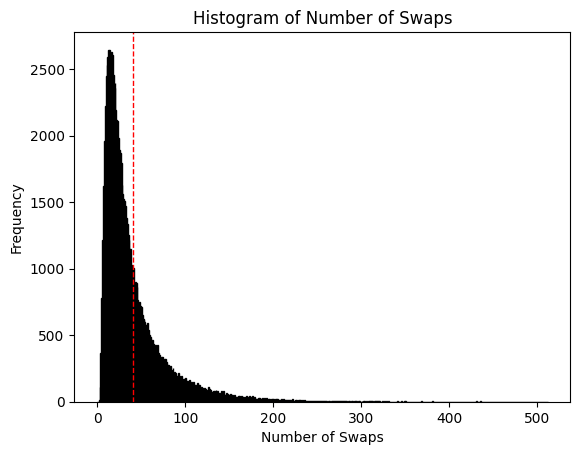

In [69]:
import matplotlib.pyplot as plt

def swap_elements(arr: List[int], i: int, j: int):
    """Swap elements at indices i and j in the array."""
    arr[i], arr[j] = arr[j], arr[i]

def random_swap(arr: List[int]):
    """Perform a random swap in the array."""
    i, j = random.sample(range(len(arr)), 2)
    swap_elements(arr, i, j)

def compute_cycles(arr: List[int]) -> List[List[int]]:
    """
    Determines the cycles in the array where the array represents a permutation.

    Args:
        arr: List[int] - The array representing the permutation.
    Returns:
        List[List[int]] - A list of cycles, where each cycle is a list of indices.
    """
    visited = [False] * len(arr)
    cycles = []
    for i in range(len(arr)):
        if not visited[i]:
            cycle = []
            x = i
            while not visited[x]:
                visited[x] = True
                cycle.append(x)
                x = arr[x]
            cycles.append(cycle)
    return cycles

def get_advantageous_swap(cycles: List[List[int]]) -> Tuple[int, int]:
    """
    Obtain the indices for two elements to swap to break a cycle from the smallest cycle.

    Args:
        cycles: List[List[int]] - The list of cycles.
    Returns:
        Tuple[int, int] - The indices to swap, or (-1, -1) if no swaps are needed.
    """
    smallest_cycle = min((cycle for cycle in cycles if len(cycle) > 1), key=len, default=None)
    if smallest_cycle:
        i = smallest_cycle[0]
        j = smallest_cycle[1]
        return i, j
    return -1, -1  # No swaps needed

# Simulation parameters
sims = 100000
n = 10
num_swaps_record = []

for _ in range(sims):
    arr = list(range(n))
    random.shuffle(arr)  # Randomly shuffle the array initially
    num_swaps = 0

    while not all(arr[i] == i for i in range(n)):
        random_swap(arr)  # Random swap after each intentional swap
        
        cycles = compute_cycles(arr)
        i, j = get_advantageous_swap(cycles)
        if i == -1:
            break  # Array is sorted
        swap_elements(arr, i, j)  # Intentional swap
        num_swaps += 1

    num_swaps_record.append(num_swaps)

print(f"Average number of swaps: {sum(num_swaps_record) / sims:.2f}")

# Plot a histogram of the number of swaps
plt.hist(num_swaps_record, bins=range(max(num_swaps_record) + 2), align='left', edgecolor='black')
plt.axvline(sum(num_swaps_record) / sims, color='red', linestyle='dashed', linewidth=1)
plt.xlabel('Number of Swaps')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Swaps')
plt.show()
